In [1]:
import yt
import trident
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import h5py
from importlib import reload
from astropy.io import fits

import MISTY

from os import listdir

In [2]:
filename = "~/Repo/yt/doc/source/quickstart/IsolatedGalaxy/galaxy0030/galaxy0030"
rfname = "/home/bb/Repo/CGM/plotting_ray/ray.h5"


In [3]:
ds = yt.load(filename)

yt : [INFO     ] 2019-05-24 11:08:42,228 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2019-05-24 11:08:42,229 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-05-24 11:08:42,230 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-24 11:08:42,231 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-24 11:08:42,232 Parameters: cosmological_simulation   = 0.0


In [4]:
tri_ray = yt.load(rfname)
hdu =MISTY.write_header(tri_ray, lines=['H I', 'C IV', 'O VI'],
                  impact=0,
                  angle=0)

yt : [INFO     ] 2019-05-24 11:08:42,403 Parameters: current_time              = 0.0060000200028298 code_time
yt : [INFO     ] 2019-05-24 11:08:42,404 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-05-24 11:08:42,405 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-05-24 11:08:42,406 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2019-05-24 11:08:42,406 Parameters: cosmological_simulation   = 0.0


In [5]:
nhdu = MISTY.write_parameter_file(ds, hdulist=hdu)

---> SIM_CODE set to  None if you don't like this, change it!
---> ASSUMING PLEIADES FOR NOW BUT SHOULD BE PASSED IN


In [6]:
hdu.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1                1 BinTableHDU     14   402R x 2C   ['50A', '50A']   


In [8]:
reload(MISTY)

<module 'MISTY' from '/home/bb/Repo/CGM/misty_fog_spectacle/MISTY.py'>

In [15]:
sg = MISTY.generate_line(tri_ray, 'H I', write=True, use_spectacle=False, hdulist=hdu)

H I [Ly a, Ly b, Ly c, Ly d, Ly e, Ly 6, Ly 7, Ly 8, Ly 9, Ly 10, Ly 11, Ly 12, Ly 13, Ly 14, Ly 15, Ly 16, Ly 17, Ly 18, Ly 19, Ly 20, Ly 21, Ly 22, Ly 23, Ly 24, Ly 25, Ly 26, Ly 27, Ly 28, Ly 29, Ly 30, Ly 31, Ly 32, Ly 33, Ly 34, Ly 35, Ly 36, Ly 37, Ly 38, Ly 39]


yt : [INFO     ] 2019-05-24 11:13:46,577 Setting instrument to Custom
yt : [INFO     ] 2019-05-24 11:13:46,584 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 112/112 [00:00<00:00, 1001.42it/s]
yt : [INFO     ] 2019-05-24 11:13:46,739 Not adding continuum Ly C: insufficient column density or out of range


[name = 'redshift'; format = 'E'
 name = 'wavelength'; format = 'E'; unit = 'Angstrom'
 name = 'tau'; format = 'E' name = 'flux'; format = 'E'
 name = 'sim_column_density'; format = 'E'
 name = 'sim_tau_ray'; format = 'E' name = 'sim_EW'; format = 'E'
 name = 'sim_delta_lambda'; format = 'E'
 name = 'sim_lambda_obs'; format = 'E'
 name = 'sim_thermal_b'; format = 'E'
 name = 'sim_thermal_width'; format = 'E']
----->>>>using  H I 1216 as LINENAME, whereas  H I  was passed. Change?
f =  0.416


In [16]:
hdu.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1                1 BinTableHDU     14   402R x 2C   ['50A', '50A']   
  2  H I 1216      1 BinTableHDU     40   1421R x 11C   ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  3  H I 1216      1 BinTableHDU     40   1421R x 11C   ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   


In [11]:
dd = tri_ray.all_data()
dd['x'][0]

1.2054687499999999e+24 cm

In [12]:
rs = [dd['x'][0],dd['y'][0],dd['z'][0] ]
re = [dd['x'][-1],dd['y'][-1],dd['z'][-1] ]

rayray = ds.ray(rs, re)

In [13]:
rayray.to_dataframe()

""


In [28]:
sg.lambda_field

YTArray([1208.62414017, 1208.63414316, 1208.64414615, ..., 1222.80838378,
         1222.81838677, 1222.82838977]) angstrom

In [19]:
import matplotlib.pyplot as plt


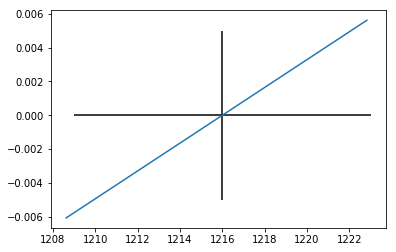

In [52]:
rshift = sg.lambda_field.value/1216 -1
plt.plot(sg.lambda_field.value, rshift)
plt.vlines(1216, .005, -.005)
plt.hlines(0, 1209, 1223)

In [23]:
z =np.median(rshift)

In [24]:
from astropy import units as u

In [33]:
lam0 = 1216
lams = sg.lambda_field.value *u.Unit('Angstrom')
dequiv = u.equivalencies.doppler_relativistic(lam0*u.Unit('Angstrom')*(z+1))

In [35]:
lams

<Quantity [1208.62414017, 1208.63414316, 1208.64414615, ..., 1222.80838378,
           1222.81838677, 1222.82838977] Angstrom>

In [38]:
vel = lams.to('km/s', equivalencies=dequiv)

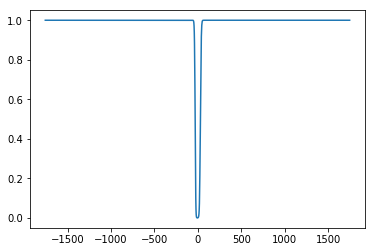

In [39]:
plt.plot(vel, sg.flux_field)

In [40]:
z

-0.0002251110468991513

In [45]:
lam0 *u.Unit('Angstrom')*1/np.median(lams)-1

<Quantity 0.00022516>

In [54]:
tri_ray.all_data()['redshift_eff']

YTArray([ 7.20460358e-10, -6.24800880e-06, -7.11835544e-06,
         -8.09164741e-06, -9.27758515e-06, -1.07315477e-05,
         -1.25287927e-05, -1.49386039e-05, -1.64405085e-05,
         -1.80588595e-05, -1.99458296e-05, -2.37464641e-05,
         -2.42010279e-05, -2.48219655e-05, -2.59513300e-05,
         -2.72635006e-05, -2.86605133e-05, -3.04197775e-05,
         -3.20411013e-05, -3.28505269e-05, -3.29934016e-05,
         -3.29289266e-05, -3.35722703e-05, -3.77239149e-05,
         -3.63796538e-05, -2.51517803e-05, -1.01152521e-05,
          2.40624668e-06,  1.48797471e-05,  9.74531168e-06,
         -9.40010735e-06, -1.69931806e-05, -6.56542263e-06,
          9.92724665e-06, -2.91977854e-06, -5.25758356e-06,
          1.66548694e-05,  1.96929847e-05,  1.94205513e-05,
          2.00458716e-05,  1.15609520e-05,  1.61564049e-06,
         -9.86524734e-06, -2.01189858e-05, -1.91551937e-05,
         -1.37817608e-05, -4.12399016e-06,  7.09668128e-06,
          8.14700257e-06,  3.50694634e-0